# Which Customers may leave ? - Churn Analysis

### Dateset

Source - https://www.kaggle.com/blastchar/telco-customer-churn

Field of Descriptions 
- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents

# Load Data

In [7]:
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_name)
df.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Extract unique values in df
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [10]:
len(df.MonthlyCharges.unique())

1585

In [11]:
print("Total rows : ", df.shape[0])
print("Num of columns : ", df.shape[1])
print("\nFeatures : \n", df.columns.tolist())
print("\nMissing Values : ", df.isnull().sum().values.sum())
print("\nUnique Values : \n", df.nunique())

Total rows :  7043
Num of columns :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing Values :  0

Unique Values : 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [12]:
# Count how many 'No' and 'Yes'
df['Churn'].value_counts(sort=False)

Yes    1869
No     5174
Name: Churn, dtype: int64

# Exploring Data

In [13]:
df_copy = df.copy()

In [14]:
# Drop unnecessary columns
df_copy.drop(['customerID','MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace=True)
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [15]:
summary = pd.concat([pd.crosstab(df_copy[x], df_copy.Churn) for x in df_copy.columns[:-1]], keys=df_copy.columns[:-1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [16]:
# Make a percentage column
summary['Churn_Percentage'] = summary['Yes'] / (summary['No'] + summary['Yes'])
summary

Churn                                         No   Yes  Churn_Percentage
gender           Female                     2549   939          0.269209
                 Male                       2625   930          0.261603
SeniorCitizen    0                          4508  1393          0.236062
                 1                           666   476          0.416813
Partner          No                         2441  1200          0.329580
                 Yes                        2733   669          0.196649
Dependents       No                         3390  1543          0.312791
                 Yes                        1784   326          0.154502
PhoneService     No                          512   170          0.249267
                 Yes                        4662  1699          0.267096
MultipleLines    No                         2541   849          0.250442
                 No phone service            512   170          0.249267
                 Yes                        2121   850          0.286099
InternetService  DSL                        1962   459          0.189591
                 Fiber optic                1799  1297          0.418928
                 No                         1413   113          0.074050
OnlineSecurity   No                         2037  1461          0.417667
                 No internet service        1413   113          0.074050
                 Yes                        1724   295          0.146112
OnlineBackup     No                         1855  1233          0.399288
                 No internet service        1413   113          0.074050
                 Yes                        1906   523          0.215315
DeviceProtection No                         1884  1211          0.391276
                 No internet service        1413   113          0.074050
                 Yes                        1877   545          0.225021
TechSupport      No                         2027  1446          0.416355
                 No internet service        1413   113          0.074050
                 Yes                        1734   310          0.151663
StreamingTV      No                         1868   942          0.335231
                 No internet service        1413   113          0.074050
                 Yes                        1893   814          0.300702
StreamingMovies  No                         1847   938          0.336804
                 No internet service        1413   113          0.074050
                 Yes                        1914   818          0.299414
Contract         Month-to-month             2220  1655          0.427097
                 One year                   1307   166          0.112695
                 Two year                   1647    48          0.028319
PaperlessBilling No                         2403   469          0.163301
                 Yes                        2771  1400          0.335651
PaymentMethod    Bank transfer (automatic)  1286   258          0.167098
                 Credit card (automatic)    1290   232          0.152431
                 Electronic check           1294  1071          0.452854
                 Mailed check               1304   308          0.191067

# Visualization

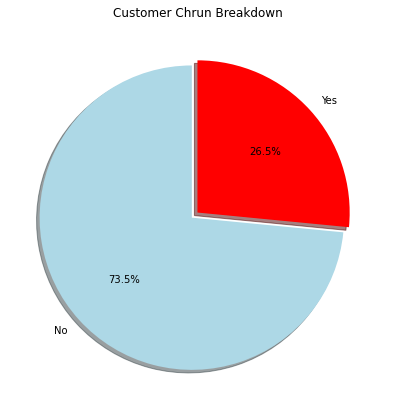

In [17]:
# Pie Chart
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams

labels = df['Churn'].value_counts(sort = True).index
sizes = df['Churn'].value_counts(sort = True)

colors = ["lightblue", "red"]
explode = (0.05, 0)

rcParams['figure.figsize'] = 7,7

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Customer Chrun Breakdown')
plt.show()

C:\Users\donlee\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


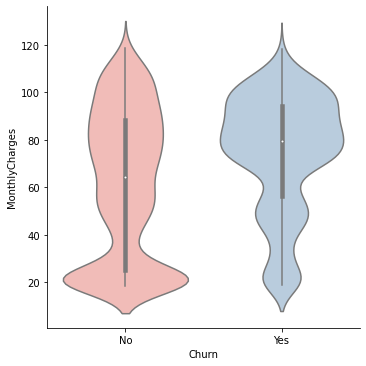

In [20]:
# Violin Plot
vp = sns.factorplot(x="Churn", y="MonthlyCharges", data=df, kind="violin", palette="Pastel1")

C:\Users\donlee\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


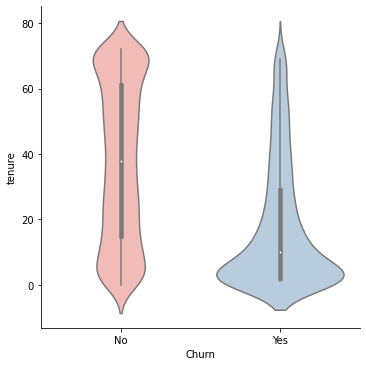

In [21]:
vp = sns.factorplot(x="Churn", y="tenure", data=df, kind="violin", palette='Pastel1')

No handles with labels found to put in legend.


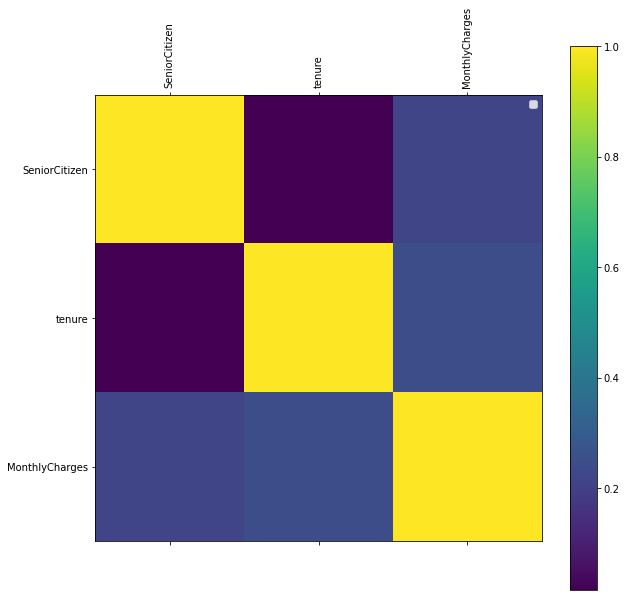

In [22]:
# Correlation Plot
import matplotlib.pyplot as plt
def plot_corr(df,size=10):
    corr = df.corr()
    fig,ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(df)

# Data Preparation for ML - Classifier

In [23]:
# Find the missing values
len(df[df['TotalCharges'] == " "])

11

In [24]:
# Drop the missing values
df = df[df['TotalCharges'] != " "]

In [25]:
len(df[df['TotalCharges'] == " "])

0

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

customer_id = ['customerID']
target_col = ['Churn']

# Categorical Columns
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

# Numerical Columns
num_cols = [x for x in df.columns if x not in cat_cols + target_col + customer_id]

# Binary columns with 2 values
bin_cols = df.nunique()[df.nunique() == 2].keys().tolist()

# Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

# Label encoing Binary columns
label = LabelEncoder()
for i in bin_cols:
    df[i] = label.fit_transform(df[i])
    
# Duplicating columns for multi value columns
df = pd.get_dummies(data=df, columns=multi_cols)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [28]:
len(df.columns)

42

In [29]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [30]:
# Scaling Numerical columns
std = StandardScaler()

# Scale data
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

#Dropping original values merging scaled values for numerical columns
df_telcom_og = df.copy()
df = df.drop(columns = num_cols, axis = 1)
df = df.merge(scaled, left_index=True, right_index=True, how="left")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,1,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,1,1,1,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [31]:
df.drop(['customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [32]:
df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
7032,1,1,0,0,1,1,1,0,0,1,...,1,0,0,0,0,1,0,NaN,NaN,NaN
7033,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,NaN,NaN,NaN
7034,0,0,0,0,1,1,1,0,0,1,...,1,0,0,0,1,0,0,NaN,NaN,NaN
7035,1,0,0,0,1,1,0,1,0,0,...,1,0,0,1,0,0,0,NaN,NaN,NaN
7036,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,NaN,NaN,NaN
7037,0,0,0,0,1,1,0,1,0,0,...,0,0,1,1,0,0,0,NaN,NaN,NaN
7038,1,0,1,1,1,1,0,0,0,1,...,0,1,0,0,0,0,1,NaN,NaN,NaN
7039,0,0,1,1,1,1,0,0,0,1,...,0,1,0,0,1,0,0,NaN,NaN,NaN
7040,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,NaN,NaN,NaN
7041,1,1,1,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,NaN,NaN,NaN


In [33]:
df=df.dropna()

In [34]:
df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges


# Modeling

In [35]:
from sklearn.model_selection import train_test_split

# Remove the label values from training data
X = df.drop(['Churn'], axis=1).values
# Assigned those label to Y dataset
y = df['Churn'].values

# Split it to 70:30 (Train : Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [36]:
type(X_train)

numpy.ndarray

In [37]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.280248,-1.480802,-0.998429
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.239504,-0.661425,-0.958370
2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.612573,0.846029,1.802758
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.057929,1.314719,0.406907
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.280248,-0.471955,-0.985039


In [38]:
print(len(df.columns))
df.columns

41


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_E

In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.7745609871855719
[[1348  188]
 [ 287  284]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1536
           1       0.60      0.50      0.54       571

    accuracy                           0.77      2107
   macro avg       0.71      0.69      0.70      2107
weighted avg       0.76      0.77      0.77      2107



# Feature Importance using Logistic Regression

In [41]:
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.02456153361158809, 0.07800104474147972, 0.2388377589489036, 0.10230905597478754, 0.11983685812170529, 0.3011087964076185, 0.06207251543769856, 0.12173100941457318, 0.05776434268395635, 0.38018338454468453, 0.4576515712687669, 0.07557403543108371, 0.31879178579040357, 0.07557403543108371, 0.2413235990664066, 0.2068454853752484, 0.07557403543108371, 0.12937729865121858, 0.1051841884153501, 0.07557403543108437, 0.027716001691249145, 0.24943710423801427, 0.07557403543108371, 0.1719689175140608, 0.039231675838337185, 0.07557403543108371, 0.11669986256243407, 0.03135936376822604, 0.07557403543108371, 0.10882755049216217, 1.196954218305194, 0.061756997680685724, 1.1333030693316364, 0.19524639868930416, 0.23240254396687643, 0.35900219036971953, 0.07054090357938037, 0.05995074676447884, 0.04694469308543155, 0.0711530677577165]


In [42]:
cols = list(df.columns)
cols.index('Churn')

6

In [43]:
del cols[6]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'Tota

In [44]:
# Sorting on Feature Importance
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

Contract_Month-to-month
Contract_Two year
InternetService_Fiber optic
InternetService_DSL
PaymentMethod_Electronic check
OnlineSecurity_No
PaperlessBilling
TechSupport_No
OnlineSecurity_Yes
Partner
PaymentMethod_Credit card (automatic)
OnlineBackup_No
PaymentMethod_Bank transfer (automatic)
TechSupport_Yes
OnlineBackup_Yes
MultipleLines_No phone service
PhoneService
StreamingTV_Yes
StreamingMovies_Yes
DeviceProtection_No
Dependents
SeniorCitizen
DeviceProtection_No internet service
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
TotalCharges
PaymentMethod_Mailed check
MultipleLines_No
Contract_One year
tenure
MultipleLines_Yes
MonthlyCharges
StreamingTV_No
StreamingMovies_No
DeviceProtection_Yes
gender


# Try Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.7588989084005695
[[1360  176]
 [ 332  239]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1536
           1       0.58      0.42      0.48       571

    accuracy                           0.76      2107
   macro avg       0.69      0.65      0.66      2107
weighted avg       0.74      0.76      0.75      2107



# Save and Load Models

In [46]:
import pickle

# Save
with open('model.pkl', 'wb') as f:
    pickle.dump(model_rf, f)
    
# Load
with open('model.pkl', 'rb') as f:
    loaded_model_rf = pickle.load(f)

In [47]:
predictions = loaded_model_rf.predict(X_test)

In [48]:
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Try to work on Deep Learning

In [49]:
import tensorflow as tf

In [51]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(20, kernel_initializer = "uniform",activation = "relu", input_dim=40))
model.add(Dense(1, kernel_initializer = "uniform", activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])



In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                820       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Tranining
batch_size = 64
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.7926 - val_loss: 0.4542 - val_accuracy: 0.7760
Epoch 2/25
77/77 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.7914 - val_loss: 0.4545 - val_accuracy: 0.7755
Epoch 3/25
77/77 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.7912 - val_loss: 0.4542 - val_accuracy: 0.7784
Epoch 4/25
77/77 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.7908 - val_loss: 0.4547 - val_accuracy: 0.7774
Epoch 5/25
77/77 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.7918 - val_loss: 0.4543 - val_accuracy: 0.7760
Epoch 6/25
77/77 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.7941 - val_loss: 0.4546 - val_accuracy: 0.7760
Epoch 7/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.7914 - val_loss: 0.4540 - val_accuracy: 0.7779
Epoch 8/25
77/77 [==

In [55]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1364  172]
 [ 305  266]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1536
           1       0.61      0.47      0.53       571

    accuracy                           0.77      2107
   macro avg       0.71      0.68      0.69      2107
weighted avg       0.76      0.77      0.76      2107



# Saving and Loading models

In [56]:
model.save("simple_cnn_25_epochs.h5")
print("Model Saved")

Model Saved


In [57]:
# Load the model
from tensorflow.keras.models import load_model

classifier = load_model('simple_cnn_25_epochs.h5')

# Use Checkpoints and Early stopping

In [62]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(2000, activation='relu', input_dim=40, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(1000, activation='relu', input_dim=40, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 3
model2.add(Dense(500, activation='relu', input_dim=40, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))
           
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

# Create check point for saving each model after each epoch
checkpoint = ModelCheckpoint("deep_model_checkpoint.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2000)              82000     
_________________________________________________________________
dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [63]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
# Define earling stopping criteria
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta=0,
                          patience=2,
                          verbose=1,
                         restore_best_weights=True)
callbacks=[earlystop, checkpoint]

In [65]:
batch_sizeh=32
epochs=10

history = model2.fit(X_train,
                     y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     callbacks=callbacks,
                     validation_data=(X_test, y_test))

score=model2.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
77/77 [==============================] - 4s 44ms/step - loss: 9.9772 - accuracy: 0.7318 - val_loss: 0.5947 - val_accuracy: 0.7746

Epoch 00001: val_loss improved from inf to 0.59468, saving model to deep_model_checkpoint.h5
Epoch 2/10
77/77 [==============================] - 3s 39ms/step - loss: 0.5311 - accuracy: 0.7959 - val_loss: 0.5221 - val_accuracy: 0.7551

Epoch 00002: val_loss improved from 0.59468 to 0.52213, saving model to deep_model_checkpoint.h5
Epoch 3/10
77/77 [==============================] - 3s 40ms/step - loss: 0.4900 - accuracy: 0.7783 - val_loss: 0.4975 - val_accuracy: 0.7703

Epoch 00003: val_loss improved from 0.52213 to 0.49749, saving model to deep_model_checkpoint.h5
Epoch 4/10
77/77 [==============================] - 3s 40ms/step - loss: 0.4818 - accuracy: 0.7878 - val_loss: 0.4924 - val_accuracy: 0.7803

Epoch 00004: val_loss improved from 0.49749 to 0.49235, saving model to deep_model_checkpoint.h5
Epoch 5/10
77/77 [==============================